In [72]:
import astropy.io
from astropy.io import fits
from astropy.table import vstack, Table
import dust_extinction
from astropy.modeling.models import BlackBody
import astropy.units as u
from dust_extinction.parameter_averages import F19
#import astroquery
import numpy as np
from numpy.polynomial.polynomial import polyfit
from numpy.polynomial.polynomial import Polynomial as Poly
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from io import StringIO 
import csv
import scipy.stats as stats
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [87]:
## 3D HST
#import dat files:
Battisti3DHST = np.genfromtxt('stacklist_3DHST.dat', names=True)
#print(Battisti3DHST.dtype.names)
Battisti3DHST = pd.DataFrame(Battisti3DHST)
Battisti3DHST['ID'] = Battisti3DHST['ID'].astype(int) 

## MOSDEF!!
# corrected data, balmer lines are corrected for stellar absorption
MOSDEFlines = fits.open('linemeas_cor.fits',memmap=True)
MOSDEFLinecols = MOSDEFlines[1].columns
#print(MOSDEFLinecols.names)
#MOSDEFdata = MOSDEFlines[1].data
MOSDEFdata = pd.DataFrame(MOSDEFdata)
print(MOSDEFdata['ID'])
print(MOSDEFdata['TDHST_VERSION'])

dat = Table.read('linemeas_cor.fits', format='fits')
df = dat.to_pandas()

HSTmas = Table.read('3dhst.v4.1.5.master.fits', format='fits')
df2 = HSTmas.to_pandas()
df2 = df2.rename(columns={"phot_id": "ID"})

# I think this worked. I merged the HST and MOSDEF datasets on the ID fields
HST_MOSDEF = pd.merge(df, df2,
                   on='ID',how='outer')

print(HST_MOSDEF.columns.values)
print(len(HST_MOSDEF['OIII5008_PREFERREDFLUX']))

# Then narrowed down to just the MOSDEF data, where OIII data is greater than 0
#HST_MOSDEF1 = HST_MOSDEF.loc[(HST_MOSDEF['OIII5008_PREFERREDFLUX']>0)&(HST_MOSDEF['AGN_flag']==0)&(np.isnan(HST_MOSDEF['logM'])==False)&(np.isnan(HST_MOSDEF['logSFR'])==False)]  
HST_MOSDEF




0       12870
1       13032
2       12793
3       12528
4       12046
        ...  
1819    41695
1820    43114
1821    40768
1822    45188
1823    45230
Name: ID, Length: 1824, dtype: int32
0       2.1
1       2.1
2       2.1
3       2.1
4       2.1
       ... 
1819    4.1
1820    4.1
1821    4.1
1822    4.1
1823    4.1
Name: TDHST_VERSION, Length: 1824, dtype: object
['FIELD' 'MASKNAME' 'ID' 'SLITOBJNAME' 'APERTURE_NO' 'Z_MOSFIRE_INITQUAL'
 'OII3727_INTERCEPT' 'OII3727_INTERCEPT_ERR' 'OII3727_SLOPE'
 'OII3727_SLOPE_ERR' 'OII3727_OBSLAM' 'OII3727_OBSLAM_ERR' 'OII3727_FWHM'
 'OII3727_FWHM_ERR' 'OII3727_FLUX' 'OII3727_FLUX_ERR' 'OII3727_Z'
 'OII3727_Z_ERR' 'OII3727_FLUXBAND' 'OII3727_FLUXBAND_ERR'
 'OII3727_MASKEDFLUX' 'OII3727_MASKEDFLUX_ERR' 'OII3727_AEFLAG'
 'OII3727_SLFLAG' 'OII3727_MEANCHISQ' 'OII3727_CHIFLAG'
 'OII3727_PREFERREDFLUX' 'OII3727_PREFERREDFLUX_ERR' 'OII3730_INTERCEPT'
 'OII3730_INTERCEPT_ERR' 'OII3730_SLOPE' 'OII3730_SLOPE_ERR'
 'OII3730_OBSLAM' 'OII3730_OBSLAM_ERR' '

,FIELD,MASKNAME,ID,SLITOBJNAME,APERTURE_NO,Z_MOSFIRE_INITQUAL,OII3727_INTERCEPT,OII3727_INTERCEPT_ERR,OII3727_SLOPE,OII3727_SLOPE_ERR,...,z,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2
0,b'AEGIS ',b'ae2_03 ',12870,12870.0000000000,1.0000000000,0.0000000000,-15.3822240000,8.0374629000,0.0013059761,0.0006870252,...,2.2400000000,8.0000000000,0.0200000000,8.5000000000,0.0000000000,9.7500000000,0.5600000000,-9.1900000000,0.5000000000,2.9200000000
1,b'AEGIS ',b'ae2_03 ',12870,12870.0000000000,1.0000000000,0.0000000000,-15.3822240000,8.0374629000,0.0013059761,0.0006870252,...,1.6000000000,9.0000000000,0.0200000000,8.8000000000,0.5000000000,9.7200000000,0.9400000000,-8.7700000000,-0.2000000000,1.8600000000
2,b'AEGIS ',b'ae2_03 ',12870,12870.0000000000,1.0000000000,0.0000000000,-15.3822240000,8.0374629000,0.0013059761,0.0006870252,...,1.6800000000,8.2000000000,0.0200000000,8.6000000000,0.0000000000,9.0900000000,0.0100000000,-9.0900000000,0.4000000000,1.5100000000
3,b'AEGIS ',b'ae2_03 ',12870,12870.0000000000,1.0000000000,0.0000000000,-15.3822240000,8.0374629000,0.0013059761,0.0006870252,...,4.6400000000,9.0000000000,0.0200000000,9.1000000000,1.1000000000,10.5900000000,1.3900000000,-9.2000000000,0.1000000000,1.2700000000
4,b'AEGIS ',b'ae2_03 ',12870,12870.0000000000,1.0000000000,0.0000000000,-15.3822240000,8.0374629000,0.0013059761,0.0006870252,...,1.6800000000,8.6000000000,0.0200000000,8.8000000000,0.0000000000,9.1000000000,0.0900000000,-9.0100000000,0.2000000000,1.1300000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208368,NaN,NaN,50503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.8700000000,7.0000000000,0.0200000000,8.4000000000,0.0000000000,8.0000000000,-9.4400000000,-17.4300000000,1.4000000000,1.4700000000
208369,NaN,NaN,50504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9000000000,7.0000000000,0.0200000000,8.8000000000,4.0000000000,NaN,NaN,-32.4800000000,1.8000000000,1.1800000000
208370,NaN,NaN,50505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0200000000,8.0000000000,0.0200000000,8.4000000000,0.3000000000,8.1900000000,-0.7100000000,-8.9000000000,0.4000000000,1.6500000000
208371,NaN,NaN,50506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2200000000,8.4000000000,0.0200000000,9.0000000000,0.4000000000,7.0600000000,-2.8500000000,-9.9100000000,0.6000000000,1.3400000000


1.86737
11.7731
9.165737847924797
3.71649e-05
2.32635
0.4553153753701578
('Field', 'ID', 'z', 'logM', 'logSFR', 'beta_obs', 'beta_obs_err', 'beta_SED', 'foiii', 'eoiii', 'EW_oiii_obs', 'fhb', 'ehb', 'fhanii', 'ehanii', 'EW_hanii_obs', 'fsii', 'esii', 'foii', 'eoii', 'AGN_flag', 'n_UV_filt', 'L_2800_sun_obs', 'L_2800_sun_SED')
1824


C:\Users\pheretz\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


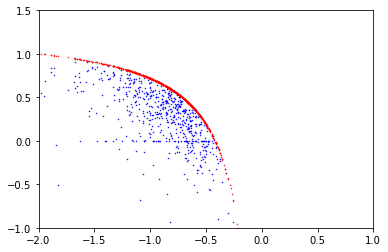

0       2.1
1       2.1
2       2.1
3       2.1
4       2.1
       ... 
1819    NaN
1820    NaN
1821    4.1
1822    NaN
1823    4.1
Name: TDHST_VERSION, Length: 1824, dtype: object
1824
809
['Field' 'ID' 'z' 'logM' 'logSFR' 'beta_obs' 'beta_obs_err' 'beta_SED'
 'foiii' 'eoiii' 'EW_oiii_obs' 'fhb' 'ehb' 'fhanii' 'ehanii'
 'EW_hanii_obs' 'fsii' 'esii' 'foii' 'eoii' 'AGN_flag' 'n_UV_filt'
 'L_2800_sun_obs' 'L_2800_sun_SED' 'FIELD' 'MASKNAME' 'SLITOBJNAME'
 'APERTURE_NO' 'Z_MOSFIRE_INITQUAL' 'OII3727_INTERCEPT'
 'OII3727_INTERCEPT_ERR' 'OII3727_SLOPE' 'OII3727_SLOPE_ERR'
 'OII3727_OBSLAM' 'OII3727_OBSLAM_ERR' 'OII3727_FWHM' 'OII3727_FWHM_ERR'
 'OII3727_FLUX' 'OII3727_FLUX_ERR' 'OII3727_Z' 'OII3727_Z_ERR'
 'OII3727_FLUXBAND' 'OII3727_FLUXBAND_ERR' 'OII3727_MASKEDFLUX'
 'OII3727_MASKEDFLUX_ERR' 'OII3727_AEFLAG' 'OII3727_SLFLAG'
 'OII3727_MEANCHISQ' 'OII3727_CHIFLAG' 'OII3727_PREFERREDFLUX'
 'OII3727_PREFERREDFLUX_ERR' 'OII3730_INTERCEPT' 'OII3730_INTERCEPT_ERR'
 'OII3730_SLOPE' 'OII3730_SLOP

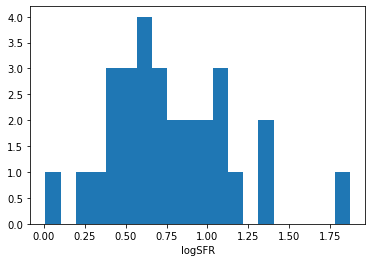

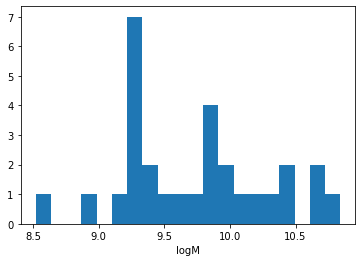

In [83]:
# Data files

## BATTISTI SDSS DATA
# source paper: https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.4431B/abstract

#import dat files:
BattistiSpecLine = np.genfromtxt('SDSS_DR7_sfg_lines.dat', names=True)
BattistiSpecProp = np.genfromtxt('SDSS_DR7_sfg_prop.dat', names=True)
#see column names:
#print(BattistiSpecProp.dtype.names)
#print(BattistiSpecProp[5])
#print(BattistiSpecLine.dtype.names)
# Stellar mass
w = np.where(BattistiSpecProp['logM_p50']>0)[0]  
print(min(BattistiSpecProp['logM_p50'][w]))
print(max(BattistiSpecProp['logM_p50'][w]))
print(sum(BattistiSpecProp['logM_p50'][w])/len(BattistiSpecProp['logM_p50'][w]))
# SFR
w = np.where(BattistiSpecProp['logSFR_p50']>0)[0]  
print(min(BattistiSpecProp['logSFR_p50'][w]))
print(max(BattistiSpecProp['logSFR_p50'][w]))
print(sum(BattistiSpecProp['logSFR_p50'][w])/len(BattistiSpecProp['logSFR_p50'][w]))

## MAPPINGS
BPASS = np.genfromtxt('grid_bpass_P6.csv',names=True,delimiter=",", dtype=str)
#display(BPASS)
#BPASScols = BPASS.columns
#print(BPASS.dtype.names)

## 3D HST
#import dat files:
Battisti3DHST = np.genfromtxt('stacklist_3DHST.dat', names=True)
print(Battisti3DHST.dtype.names)
Battisti3DHST = pd.DataFrame(Battisti3DHST)

## MOSDEF!!
# corrected data, balmer lines are corrected for stellar absorption
MOSDEFlines = fits.open('linemeas_cor.fits',memmap=True)
MOSDEFLinecols = MOSDEFlines[1].columns
#print(MOSDEFLinecols.names)
MOSDEFdata = MOSDEFlines[1].data
MOSDEFdata = pd.DataFrame(MOSDEFdata)

## MOSDEF Lines 
# recommend using the preferred flux, ** already corrected for s/n > 3**
# OIII doublet
OIII5008_MOSDEF = MOSDEFdata['OIII5008_PREFERREDFLUX']
OIII4960_MOSDEF = MOSDEFdata['OIII4960_PREFERREDFLUX']
### THIS IS THE AURORAL LINE!!! :D
OIII4364_MOSDEF = MOSDEFdata['OIII4364_PREFERREDFLUX']
OIII4364detect = np.where(OIII4364_MOSDEF >0)[0]
#print(len(OIII4364detect))
Ha_MOSDEF = MOSDEFdata['HA6565_PREFERREDFLUX']
Hb_MOSDEF = MOSDEFdata['HB4863_PREFERREDFLUX']
NII85_MOSDEF = MOSDEFdata['NII6585_PREFERREDFLUX']
NII50_MOSDEF = MOSDEFdata['NII6550_PREFERREDFLUX']

# # try to segment star-forming
# #MOSDEFstarform = np.where( (OIII5008_MOSDEF>0)& (OIII4960_MOSDEF>0) &( Ha_MOSDEF >0)&(Hb_MOSDEF>0)&(NII85_MOSDEF>0)&(NII50_MOSDEF>0))
# #MOSDEFstarform = MOSDEFdata.loc[(np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))>((0.61/(np.log10((NII85_MOSDEF/Ha_MOSDEF))-0.05))+1.3))]#&((NII85_MOSDEF/Ha_MOSDEF)>0)]
# MOSDEFstarform = MOSDEFdata.mask(np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))>((0.61/(np.log10((NII85_MOSDEF/Ha_MOSDEF))-0.05))+1.3))
# MOSDEFstarform = MOSDEFstarform.mask(np.log10((NII85_MOSDEF/Ha_MOSDEF))>0)
# MOSDEFstarform = MOSDEFstarform.mask(MOSDEFstarform['TDHST_VERSION']=="NaN")

#MOSDEFstarform = MOSDEFdata.loc[np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))>((0.61/(np.log10((NII85_MOSDEF/Ha_MOSDEF))-0.05))+1.3)&(np.log10((NII85_MOSDEF/Ha_MOSDEF))>0)&(MOSDEFstarform['TDHST_VERSION']!="NaN")]

#print(MOSDEFstarform.columns.values)

# uncorrected lines
OII3727_MOSDEF = MOSDEFstarform['OII3727_PREFERREDFLUX']
OII3730_MOSDEF = MOSDEFstarform['OII3730_PREFERREDFLUX_ERR']
OIII5008_MOSDEF = MOSDEFstarform['OIII5008_PREFERREDFLUX']
print(len(MOSDEFstarform['OIII5008_PREFERREDFLUX']))
OIII4960_MOSDEF = MOSDEFstarform['OIII4960_PREFERREDFLUX']
OIII_MOSDEF = OIII5008_MOSDEF + OIII4960_MOSDEF 
Ha_MOSDEF = MOSDEFstarform['HA6565_PREFERREDFLUX']
Hb_MOSDEF = MOSDEFstarform['HB4863_PREFERREDFLUX']
NII85_MOSDEF = MOSDEFstarform['NII6585_PREFERREDFLUX']
NII50_MOSDEF = MOSDEFstarform['NII6550_PREFERREDFLUX']
NII_MOSDEF = NII85_MOSDEF + NII50_MOSDEF
SII18_MOSDEF = MOSDEFstarform['SII6718_PREFERREDFLUX']
SII33_MOSDEF = MOSDEFstarform['SII6733_PREFERREDFLUX']
SII_MOSDEF = SII18_MOSDEF + SII33_MOSDEF

## Test what's going on w MOSDEF w a BPT
# not dust-corrected
x1 = np.log10((NII85_MOSDEF/Ha_MOSDEF))
y1 = np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))
# Kewley 2001 line:
# log(OIII/Hb) = (0.61/(log(NII/Ha)-.47))+1.19
# Kauffman line
kauffline = (0.61/(x1-0.05))+1.3

#Plot
plt.scatter(x1,y1,s=1, c='b', marker='.')
plt.scatter(x1,kauffline ,s=1, c='r', marker='.')
plt.xlim([-2,1])
plt.ylim([-1,1.5])
#plt.xlabel("Log([NII]/Halpha)")
#plt.ylabel("Log([OIII]/Hbeta)")
#plt.text(0,1,"Uncorrected dust")
plt.show()

#### MOSDEF STATS ####
# 1824 total galaxies
# 414 with a 4364 detection

print(MOSDEFstarform['TDHST_VERSION'])

MOSDEFstarform
print(len(MOSDEFstarform))
Battisti3DHST
print(len(Battisti3DHST))

# I think this worked. I merged the HST and MOSDEF datasets on the ID fields
HST_MOSDEF = pd.merge(Battisti3DHST,MOSDEFstarform, 
                   on='ID',how='outer')

print(HST_MOSDEF.columns.values)

# Then narrowed down to just the MOSDEF data, where OIII data is greater than 0
HST_MOSDEF1 = HST_MOSDEF.loc[(HST_MOSDEF['OIII5008_PREFERREDFLUX']>0)&(HST_MOSDEF['AGN_flag']==0)&(np.isnan(HST_MOSDEF['logM'])==False)&(np.isnan(HST_MOSDEF['logSFR'])==False)]  
HST_MOSDEF1
# The length is 724, which is less than the MOSDEF sample, I think what we want
print('len HSTMOSDEF',len(HST_MOSDEF1['OIII5008_PREFERREDFLUX']))
print(len(HST_MOSDEF1['logM']))
HST_MOSDEF_logM = HST_MOSDEF1['logM']
print(len(HST_MOSDEF_logM))
print((HST_MOSDEF_logM))
HST_MOSDEF_logSFR = HST_MOSDEF1['logSFR']
print(len(HST_MOSDEF_logSFR))
print((HST_MOSDEF_logSFR))

plt.figure()
plt.hist(HST_MOSDEF_logSFR, bins=20) 
#plt.text(8,50,'logSFR: MOSDEF')
plt.xlabel("logSFR")
plt.show()

plt.figure()
plt.hist(HST_MOSDEF_logM, bins=20) 
#plt.text(8,50,'logM: MOSDEF')
plt.xlabel("logM")
plt.show()


In [43]:
## Dust Extinction 

# Correcting for dust in each galaxy, based off of F19 model of MW dust extinction 
# See this doc for more information 
# https://docs.google.com/document/d/1DAK7oo5JPau576Z7sWnu0bUdTS8y4rS92MxC76ky0xQ/edit?usp=sharing

# Battisti SDSS data values, uncorrected
OIII5007_Batt = BattistiSpecLine['OIII_5007']
OIII4959_Batt = BattistiSpecLine['OIII_4959']
OIII_Batt = BattistiSpecLine['OIII_5007'] + BattistiSpecLine['OIII_4959']
Hbeta_Batt = BattistiSpecLine['Hb']
NII48_Batt = BattistiSpecLine['NII_6548']
NII84_Batt = BattistiSpecLine['NII_6584']
NII_Batt = NII48_Batt + NII84_Batt
Halpha_Batt = BattistiSpecLine['Ha']
SII17_Batt = BattistiSpecLine['SII_6717']
SII31_Batt = BattistiSpecLine['SII_6731']
SII_Batt = BattistiSpecLine['SII_6717'] + BattistiSpecLine['SII_6731']
OII26_Batt = BattistiSpecLine['OII_3726']
OII29_Batt = BattistiSpecLine['OII_3729']
OII_Batt = BattistiSpecLine['OII_3726'] + BattistiSpecLine['OII_3729']

# Observed Ha/Hb ratio
Ha_Hb_obs = Halpha_Batt / Hbeta_Batt
# Intrinsic Ha/Hb ratio value, given to me by Andrew Battisti
Ha_Hb_int = 2.86

int_obs = Ha_Hb_int / Ha_Hb_obs
int_obsavg = np.sum(int_obs)/len(int_obs)
int_obs_max = np.max(int_obs)
int_obs_min = np.min(int_obs)
#print(int_obsavg)
#print(int_obs_max)
#print(int_obs_min)

# k values for each line in question
ext = F19(Rv=3.1)
# units in parentheses are: 1/wavelength(um) units 
# and we will assume Rv=3.1, which is the avg MW value.
k_Hb = ext(1/.48613)*3.1
k_Ha = ext(1/.65628)*3.1
#print(k_Ha) #looks good
#print(k_Hb) #looks good
k_OIII5007 = ext(1/.5007)*3.1
k_OIII4959 = ext(1/.4959)*3.1
k_NII84 = ext(1/.6584)*3.1
k_NII48 = ext(1/.6548)*3.1
k_SII17 = ext(1/.6717)*3.1
k_SII31 = ext(1/.6731)*3.1
k_OII26 = ext(1/.3726)*3.1
k_OII29 = ext(1/.3729)*3.1

## Color correction, E(B-V) = log10 ( (Ha/Hb)obs / (Ha/Hb)int ) / (0.4(k(Hb) - (k(Ha))))
EB_V = np.log10( Ha_Hb_obs / Ha_Hb_int ) / (0.4*(k_Hb - k_Ha))
#print(EB_V[44]) # looks good, Andrew says should be less than 0.9
#print(max(EB_V))
#print(min(EB_V))
print("Average EBV",np.sum(EB_V)/len(EB_V))
print("Max EBV",max(EB_V))
print("Min EBV",min(EB_V))
print(EB_V)

## Intrinsic flux, accounting for attenuation, Fint = Fatt * 10^ (0.4*k(lambda)*EB_V)
#Halpha_Batt_int = (pow(10,0.4*k_Ha*EB_V))*Halpha_Batt #10**(0.4*k_Ha*EB_V))
x = (pow(10,0.4*k_Ha*EB_V)) 
Halpha_Batt_int = x*Halpha_Batt
#cleanedList = [x for x in Halpha_Batt_int if (np.isnan(x) == False)]
#print(cleanedList)
Hbeta_Batt_int = (pow(10,0.4*k_Hb*EB_V))*Hbeta_Batt
OIII5007_Batt_int = (pow(10,0.4*k_OIII5007*EB_V))*OIII5007_Batt
OIII4959_Batt_int = (pow(10,0.4*k_OIII4959*EB_V))*OIII4959_Batt
OIII_Batt_int = OIII5007_Batt_int + OIII4959_Batt_int
NII84_Batt_int = (pow(10,0.4*k_NII84*EB_V))*NII84_Batt
NII48_Batt_int = (pow(10,0.4*k_NII48*EB_V))*NII48_Batt
NII_Batt_int = NII84_Batt_int + NII48_Batt_int
SII17_Batt_int = (pow(10,0.4*k_SII17*EB_V))*SII17_Batt
SII31_Batt_int = (pow(10,0.4*k_SII31*EB_V))*SII31_Batt
SII_Batt_int = SII17_Batt_int + SII31_Batt_int
OII26_Batt_int = (pow(10,0.4*k_OII26*EB_V))*OII26_Batt
OII29_Batt_int = (pow(10,0.4*k_OII29*EB_V))*OII29_Batt
OII_Batt_int = OII26_Batt_int + OII29_Batt_int

# check out averages to see if working correctly.
# avg around 2, looks good
Haratio = Halpha_Batt_int/Halpha_Batt
Haavg = np.sum(Haratio)/len(Haratio)
#print(Haavg)
Hbratio = Hbeta_Batt_int/Hbeta_Batt
Hbavg = np.sum(Hbratio)/len(Hbratio)
#print(Hbavg)
OIIIratio = OIII5007_Batt_int/OIII5007_Batt
OIIIavg = np.sum(OIIIratio)/len(OIIIratio)
#print(OIIIavg)
NII84ratio = NII84_Batt_int/NII84_Batt
NII84avg = np.sum(NII84ratio)/len(NII84ratio)
#print(NII84avg)

## BPT diagram for sanity check
# Should just be star forming branch
# Dust is canceled in BPT ratios, so should look same
# Looks great!

# dust-corrected
x = np.log10((NII84_Batt_int/Halpha_Batt_int))
y = np.log10((OIII_Batt_int/Hbeta_Batt_int))

# not dust-corrected
x1 = np.log10((NII84_Batt/Halpha_Batt))
y1 = np.log10((OIII_Batt/Hbeta_Batt))


### MOSDEF Dust correction

# uncorrected lines
OII3727_MOSDEF = np.array(HST_MOSDEF1['OII3727_PREFERREDFLUX'])
OII3730_MOSDEF = np.array(HST_MOSDEF1['OII3730_PREFERREDFLUX_ERR'])
OIII5008_MOSDEF = np.array(HST_MOSDEF1['OIII5008_PREFERREDFLUX'])
print(len(HST_MOSDEF1['OIII5008_PREFERREDFLUX']))
OIII4960_MOSDEF = np.array(HST_MOSDEF1['OIII4960_PREFERREDFLUX'])
OIII_MOSDEF = OIII5008_MOSDEF + OIII4960_MOSDEF 
Ha_MOSDEF = np.array(HST_MOSDEF1['HA6565_PREFERREDFLUX'])
Hb_MOSDEF = np.array(HST_MOSDEF1['HB4863_PREFERREDFLUX'])
NII85_MOSDEF = np.array(HST_MOSDEF1['NII6585_PREFERREDFLUX'])
NII50_MOSDEF = np.array(HST_MOSDEF1['NII6550_PREFERREDFLUX'])
NII_MOSDEF = NII85_MOSDEF + NII50_MOSDEF
SII18_MOSDEF = np.array(HST_MOSDEF1['SII6718_PREFERREDFLUX'])
SII33_MOSDEF = np.array(HST_MOSDEF1['SII6733_PREFERREDFLUX'])
SII_MOSDEF = SII18_MOSDEF + SII33_MOSDEF

# Observed Ha/Hb ratio
Ha_Hb_obs_MOSDEF = Ha_MOSDEF / Hb_MOSDEF
# Intrinsic Ha/Hb ratio value, given to me by Andrew Battisti
Ha_Hb_int = 2.86

int_obs_MOSDEF = Ha_Hb_int / Ha_Hb_obs_MOSDEF
int_obsavg_MOSDEF = np.sum(int_obs_MOSDEF)/len(int_obs_MOSDEF)
int_obs_max = np.max(int_obs_MOSDEF)
int_obs_min = np.min(int_obs_MOSDEF)
#print(int_obsavg_MOSDEF)
#print(int_obs_max)
#print(int_obs_min)

# k values for each line in question
ext = F19(Rv=3.1)
# units in parentheses are: 1/wavelength(um) units 
# and we will assume Rv=3.1, which is the avg MW value.
k_Hb = ext(1/.48613)*3.1
k_Ha = ext(1/.65628)*3.1
#print(k_Ha) #looks good
#print(k_Hb) #looks good
k_OIII5007 = ext(1/.5007)*3.1
k_OIII4959 = ext(1/.4959)*3.1
k_NII85 = ext(1/.6584)*3.1
k_NII50 = ext(1/.6584)*3.1
k_SII18 = ext(1/.6718)*3.1
k_SII33 = ext(1/.6733)*3.1
k_OII27 = ext(1/.3727)*3.1
k_OII30 = ext(1/.3730)*3.1

## Color correction, E(B-V) = log10 ( (Ha/Hb)obs / (Ha/Hb)int ) / (0.4(k(Hb) - (k(Ha))))
EB_V_MOS = np.log10( Ha_Hb_obs_MOSDEF / Ha_Hb_int ) / (0.4*(k_Hb - k_Ha))

## Intrinsic flux, accounting for attenuation, Fint = Fatt * 10^ (0.4*k(lambda)*EB_V)
x = (pow(10,0.4*k_Ha*EB_V_MOS)) 
Halpha_MOS_int = x*Ha_MOSDEF
Hbeta_MOS_int = (pow(10,0.4*k_Hb*EB_V_MOS))*Hb_MOSDEF
OII3727_MOS_int = (pow(10,0.4*k_OII27*EB_V_MOS))*OII3727_MOSDEF
OII3730_MOS_int = (pow(10,0.4*k_OII30*EB_V_MOS))*OII3730_MOSDEF
OII_MOS_int = OII3727_MOS_int + OII3730_MOS_int
OIII5008_MOS_int = (pow(10,0.4*k_OIII5007*EB_V_MOS))*OIII5008_MOSDEF
OIII4960_MOS_int = (pow(10,0.4*k_OIII4959*EB_V_MOS))*OIII4960_MOSDEF
NII85_MOS_int = (pow(10,0.4*k_NII85*EB_V_MOS))*NII85_MOSDEF 
NII50_MOS_int = (pow(10,0.4*k_NII50*EB_V_MOS))*NII50_MOSDEF 
NII_MOS_int = NII85_MOS_int + NII50_MOS_int
OIII_MOS_int = OIII5008_MOS_int + OIII4960_MOS_int
SII18_MOS_int = (pow(10,0.4*k_SII18*EB_V_MOS))*SII18_MOSDEF
SII33_MOS_int = (pow(10,0.4*k_SII33*EB_V_MOS))*SII33_MOSDEF
SII_MOS_int = SII18_MOS_int + SII33_MOS_int

## Test what's going on w MOSDEF w a BPT
# not dust-corrected
x1 = np.log10((NII85_MOSDEF/Ha_MOSDEF))
y1 = np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))
#Plot
#plt.scatter(x1,y1,s=1, c='b', marker='.')
#plt.xlim([-2,1])
#plt.ylim([-1,1.5])
#plt.xlabel("Log([NII]/Halpha)")
#plt.ylabel("Log([OIII]/Hbeta)")
#plt.text(0,1,"Uncorrected dust")
#plt.show()

# Kewley 2001 line:
# log(OIII/Hb) = (0.61/(log(NII/Ha)-.47))+1.19
xt = np.linspace(-2,1,1000)
kewline = (0.61/(xt-0.47))+1.19
# Kauffmann 2003 line:
# log([O III ]/Hβ) > 0.61/{log([N II ]/Hα) − 0.05} + 1.3.
kauffline = (0.61/(xt-0.05))+1.3

# dust-corrected
x2 = np.log10((NII85_MOS_int/Halpha_MOS_int))
y2 = np.log10((OIII5008_MOS_int /Hbeta_MOS_int ))

# SDSS dust-corrected
x = np.log10((NII84_Batt_int/Halpha_Batt_int))
y = np.log10((OIII_Batt_int/Hbeta_Batt_int))

#Plot
#plt.scatter(x,y,s=.0001, c='m', marker='.')
#plt.scatter(x2,y2,s=1, c='b', marker='.')
#plt.scatter(xt,kewline,s=1, c='r', marker='.')
#plt.scatter(xt,kauffline,s=1, c='r', marker='.')
#plt.xlim([-2,1])
#plt.ylim([-1,1.5])
#plt.xlabel("Log([NII]/Halpha)")
#plt.ylabel("Log([OIII]/Hbeta)")
#plt.text(0,1,"Uncorrected dust")
#plt.show()



Average EBV 0.2714925327543653
Max EBV 1.224562976783731
Min EBV -0.43022016793103585
[0.25401468 0.09814365 0.43617536 ... 0.29184659 0.27597485 0.20308185]
29


C:\Users\pheretz\Anaconda3\lib\site-packages\dust_extinction\helpers.py:30: UserWarning: x has no units, assuming x units are inverse microns
  warnings.warn(
C:\Users\pheretz\AppData\Local\Temp\ipykernel_11212\474055217.py:161: RuntimeWarning: invalid value encountered in log10
  EB_V_MOS = np.log10( Ha_Hb_obs_MOSDEF / Ha_Hb_int ) / (0.4*(k_Hb - k_Ha))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_11212\474055217.py:182: RuntimeWarning: invalid value encountered in log10
  x1 = np.log10((NII85_MOSDEF/Ha_MOSDEF))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_11212\474055217.py:183: RuntimeWarning: invalid value encountered in log10
  y1 = np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_11212\474055217.py:202: RuntimeWarning: invalid value encountered in log10
  x2 = np.log10((NII85_MOS_int/Halpha_MOS_int))


In [44]:
### H23

SDSS_SFR = BattistiSpecProp['logSFR_p50']

MOSDEF_z = HST_MOSDEF1['z']


HaN2_O3_corSDSS = np.log10((Halpha_Batt_int + NII_Batt_int) / OIII_Batt_int)
HaN2_O3_uncSDSS = np.log10((Halpha_Batt + NII_Batt) / OIII_Batt)

HaN2_O3_corMOSDEF = np.log10((Halpha_MOS_int + NII_MOS_int) / OIII_MOS_int)
HaN2_O3_uncMOSDEF = np.log10((Ha_MOSDEF + NII_MOSDEF) / OIII_MOSDEF)
print(len(HaN2_O3_uncMOSDEF))


29


C:\Users\pheretz\AppData\Local\Temp\ipykernel_11212\1200440063.py:10: RuntimeWarning: divide by zero encountered in true_divide
  y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_11212\1200440063.py:10: RuntimeWarning: invalid value encountered in log10
  y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_11212\1200440063.py:13: RuntimeWarning: divide by zero encountered in true_divide
  y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_11212\1200440063.py:13: RuntimeWarning: invalid value encountered in log10
  y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_11212\1200440063.py:19: RuntimeWarning: invalid value encountered in log10
  y = (np.log10(NII85_MOS_i

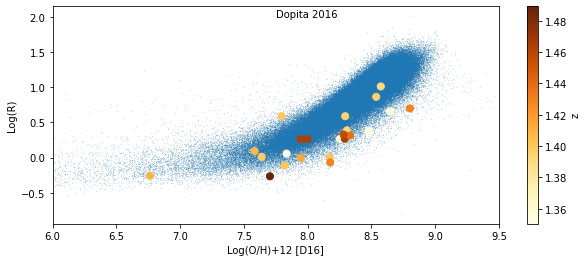

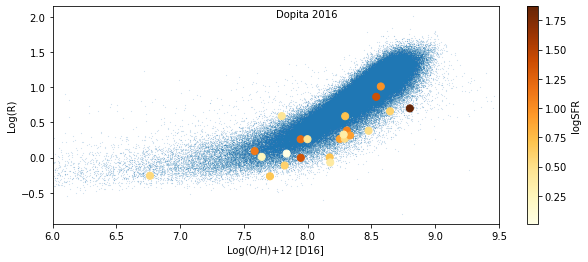

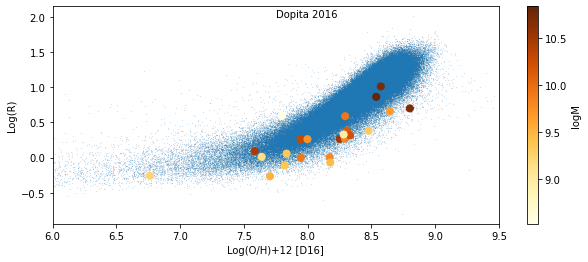

In [52]:
####
## Dopita 16 Metallicity calculation 
####

# log(O/H) +12 = 8.77 + y + 0.45(y+0.3)^5
# y = log(N2)/S2 + 0.264log(N2)/Ha

## SDSS
# corrected
y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
D16_intSDSS =  8.77 + y + 0.45*((y+0.3)**5)
# uncorrected
y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))
D16_uncSDSS =  8.77 + y1 + 0.45*((y1+0.3)**5)
# values in a resonable range, but all around 8.7 and 8.8


## MOSDEF
y = (np.log10(NII85_MOS_int/ SII_MOS_int)) + (0.264*np.log(NII85_MOS_int/Halpha_MOS_int))
D16_intMOSDEF =  8.77 + y + 0.45*((y+0.3)**5)
# uncorrected
y1 = (np.log10(NII85_MOSDEF/ SII_MOSDEF)) + (0.264*np.log(NII85_MOSDEF/Ha_MOSDEF))
D16_uncMOSDEF =  8.77 + y1 + 0.45*((y1+0.3)**5)

## BASIC PLOT, with spearman correlation

plt.figure(figsize=(10,4))
#plt.plot(D16_intSDSS, HaN2_O3_uncSDSS, '.', markersize = 0.11)
#plt.plot(D16_intMOSDEF, HaN2_O3_uncMOSDEF, '.', markersize = 11)
#plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = HST_MOSDEF_logSFR , cmap = 'YlOrBr' , s = 11)
plt.scatter(D16_intSDSS, HaN2_O3_uncSDSS , s = 0.005)
plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = MOSDEF_z , cmap = 'YlOrBr' , s = 50)
plt.colorbar(label="z")
plt.xlim(6,9.5)
plt.text(7.75,2, 'Dopita 2016')
plt.xlabel('Log(O/H)+12 [D16]')
plt.ylabel('Log(R)')
plt.show()

plt.figure(figsize=(10,4))
#plt.plot(D16_intSDSS, HaN2_O3_uncSDSS, '.', markersize = 0.11)
#plt.plot(D16_intMOSDEF, HaN2_O3_uncMOSDEF, '.', markersize = 11)
plt.scatter(D16_intSDSS, HaN2_O3_uncSDSS , s = 0.005)
plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = HST_MOSDEF_logSFR , cmap = 'YlOrBr' , s = 50)
#plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = MOSDEF_z , cmap = 'YlOrBr' , s = 50)
plt.colorbar(label="logSFR")
plt.xlim(6,9.5)
plt.text(7.75,2, 'Dopita 2016')
plt.xlabel('Log(O/H)+12 [D16]')
plt.ylabel('Log(R)')
plt.show()

plt.figure(figsize=(10,4))
#plt.plot(D16_intSDSS, HaN2_O3_uncSDSS, '.', markersize = 0.11)
#plt.plot(D16_intMOSDEF, HaN2_O3_uncMOSDEF, '.', markersize = 11)
plt.scatter(D16_intSDSS, HaN2_O3_uncSDSS , s = 0.005)
plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = HST_MOSDEF_logM , cmap = 'YlOrBr' , s = 50)
#plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = MOSDEF_z , cmap = 'YlOrBr' , s = 50)
plt.colorbar(label="logM")
plt.xlim(6,9.5)
plt.text(7.75,2, 'Dopita 2016')
plt.xlabel('Log(O/H)+12 [D16]')
plt.ylabel('Log(R)')
plt.show()


In [ ]:
####
## Dopita 16 Metallicity calculation 
####

# log(O/H) +12 = 8.77 + y + 0.45(y+0.3)^5
# y = log(N2)/S2 + 0.264log(N2)/Ha

## SDSS
# corrected
y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
D16_intSDSS =  8.77 + y + 0.45*((y+0.3)**5)
# uncorrected
y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))
D16_uncSDSS =  8.77 + y1 + 0.45*((y1+0.3)**5)
# values in a resonable range, but all around 8.7 and 8.8


## MOSDEF
y = (np.log10(NII85_MOS_int/ SII_MOS_int)) + (0.264*np.log(NII85_MOS_int/Halpha_MOS_int))
D16_intMOSDEF =  8.77 + y + 0.45*((y+0.3)**5)
# uncorrected
y1 = (np.log10(NII85_MOSDEF/ SII_MOSDEF)) + (0.264*np.log(NII85_MOSDEF/Ha_MOSDEF))
D16_uncMOSDEF =  8.77 + y1 + 0.45*((y1+0.3)**5)

## BASIC PLOT, with spearman correlation

plt.figure(figsize=(10,4))
#plt.plot(D16_intSDSS, HaN2_O3_uncSDSS, '.', markersize = 0.11)
#plt.plot(D16_intMOSDEF, HaN2_O3_uncMOSDEF, '.', markersize = 11)
#plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = HST_MOSDEF_logSFR , cmap = 'YlOrBr' , s = 11)
plt.scatter(D16_intSDSS, HaN2_O3_uncSDSS , s = 0.005)
plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = MOSDEF_z , cmap = 'YlOrBr' , s = 50)
plt.colorbar(label="z")
plt.xlim(6,9.5)
plt.text(7.75,2, 'Dopita 2016')
plt.xlabel('Log(O/H)+12 [D16]')
plt.ylabel('Log(R)')
plt.show()

plt.figure(figsize=(10,4))
#plt.plot(D16_intSDSS, HaN2_O3_uncSDSS, '.', markersize = 0.11)
#plt.plot(D16_intMOSDEF, HaN2_O3_uncMOSDEF, '.', markersize = 11)
plt.scatter(D16_intSDSS, HaN2_O3_uncSDSS , s = 0.005)
plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = HST_MOSDEF_logSFR , cmap = 'YlOrBr' , s = 50)
#plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = MOSDEF_z , cmap = 'YlOrBr' , s = 50)
plt.colorbar(label="logSFR")
plt.xlim(6,9.5)
plt.text(7.75,2, 'Dopita 2016')
plt.xlabel('Log(O/H)+12 [D16]')
plt.ylabel('Log(R)')
plt.show()

plt.figure(figsize=(10,4))
#plt.plot(D16_intSDSS, HaN2_O3_uncSDSS, '.', markersize = 0.11)
#plt.plot(D16_intMOSDEF, HaN2_O3_uncMOSDEF, '.', markersize = 11)
plt.scatter(D16_intSDSS, HaN2_O3_uncSDSS , s = 0.005)
plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = HST_MOSDEF_logM , cmap = 'YlOrBr' , s = 50)
#plt.scatter(D16_intMOSDEF, HaN2_O3_uncMOSDEF, c = MOSDEF_z , cmap = 'YlOrBr' , s = 50)
plt.colorbar(label="logM")
plt.xlim(6,9.5)
plt.text(7.75,2, 'Dopita 2016')
plt.xlabel('Log(O/H)+12 [D16]')
plt.ylabel('Log(R)')
plt.show()